In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/imdb_cleaned_final.csv')

In [6]:
genre_dict= {
            28:'Action' 
            ,12:'Adventure' 
            ,16:'Animation' 
            ,35:'Comedy' 
            ,80:'Crime' 
            ,99:'Documentary' 
            ,18:'Drama' 
            ,10751:'Family' 
            ,14:'Fantasy' 
            ,36:'History' 
            ,27:'Horror' 
            ,10402:'Music' 
            ,9648:'Mystery' 
            ,10749:'Romance' 
            ,878: 'Science Fiction '
            ,10770: 'TV  Movie' 
            ,53:'Thriller' 
            ,10752:'War' 
            ,37:'Western' 
}

df['genre_str'] = df['genre_id'].map(genre_dict)
df.dropna(axis='rows', subset=['genre_id'], inplace=True) 

In [20]:
def bar(height,y,x_label,y_tick_label, y_label,  title, x_tick_label=None, colors=None, x_tick_range=None):
    plt.style.use('fivethirtyeight')
    
    fig, ax = plt.subplots()
    if colors:
        ax.barh(y,height, color=colors)
    else:
        ax.barh(y,height)
    ax.set_title(title)
    ax.set_yticks(range(len(y)))
    ax.set_yticklabels(y_tick_label)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    if x_tick_label:
        ax.set_xlim(x_tick_range)
        ax.set_xticklabels(x_tick_label)
    
    plt.show()

def get_colors(values, threshold):
    for val in values:
        print(val)
    colors = ['blue' if val < threshold else 'red' for val in values]
    return colors

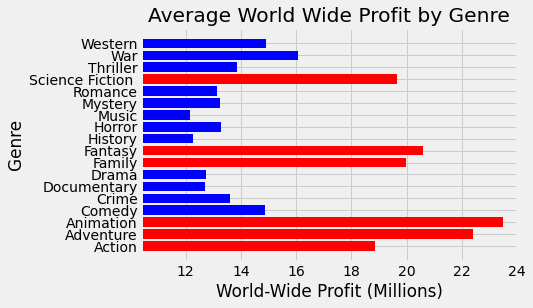

In [39]:
'''
Genre and world wide net profit
'''
world_profit_by_genre = df.groupby('genre_str')['Worldwide Net Profit'].mean()
bar_colors = get_colors(world_profit_by_genre.values, 2e8)
bar(
    world_profit_by_genre.values
    ,range(len(world_profit_by_genre))
    ,'World-Wide Profit (Millions)'
    ,world_profit_by_genre.index.values
    ,'Genre'
    ,'Average World Wide Profit by Genre'
    ,x_tick_label=range(10,350,2)
    ,x_tick_range = (10000000, 350000000)
    ,colors=bar_colors
)

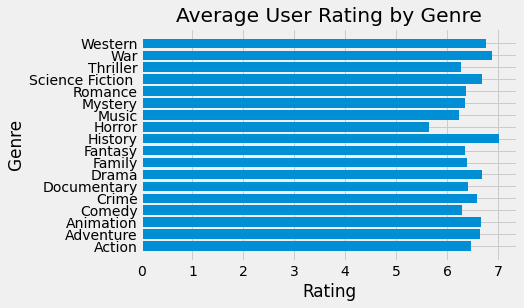

In [11]:
'''
genre and average_rating
'''
rating_df = df.loc[df['numvotes'] >=100, ['genre_str', 'averagerating']] #filters out 
average_rating_genre = df.groupby('genre_str')['averagerating'].mean()

bar(
    average_rating_genre.values
    ,range(len(average_rating_genre))
    ,'Rating'
    ,average_rating_genre.index.values
    ,'Genre'
    ,'Average User Rating by Genre'
)